In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np


In [42]:
raw = mne.io.read_raw_gdf('A01T.gdf', preload=True)


Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
D:\ANACONDA\envs\ML_py38_CU\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [3]:
raw.filter(1,30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 sec)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [4]:
raw.info['ch_names']

['EEG-Fz',
 'EEG-0',
 'EEG-1',
 'EEG-2',
 'EEG-3',
 'EEG-4',
 'EEG-5',
 'EEG-C3',
 'EEG-6',
 'EEG-Cz',
 'EEG-7',
 'EEG-C4',
 'EEG-8',
 'EEG-9',
 'EEG-10',
 'EEG-11',
 'EEG-12',
 'EEG-13',
 'EEG-14',
 'EEG-Pz',
 'EEG-15',
 'EEG-16',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [5]:
data=raw.get_data()

In [6]:

raw.info['sfreq']

250.0

In [14]:

ch_names=['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1','CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz','FP1','FPz','FP2']
sfreq=raw.info['sfreq']
ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eog','eog','eog']
events_x = raw.info['events']

info=mne.create_info(ch_names=ch_names,ch_types=ch_types,sfreq=sfreq)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

Creating RawArray with float64 data, n_channels=25, n_times=672528
    Range : 0 ... 672527 =      0.000 ...  2690.108 secs
Ready.


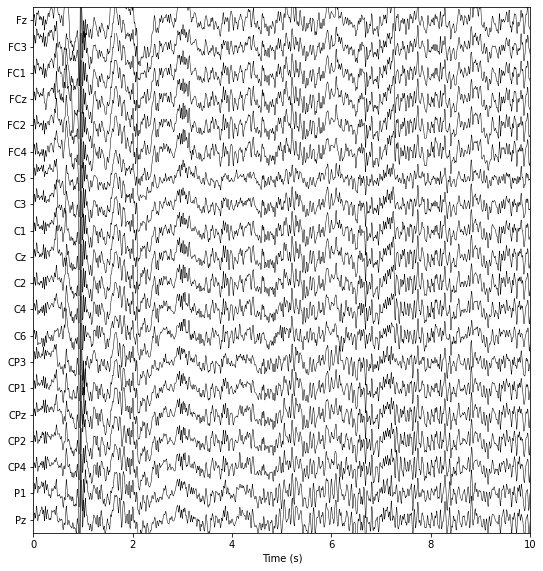

In [15]:
custom_raw=mne.io.RawArray(data,info)
custom_raw.plot(show_scrollbars=False,show_scalebars=False)
plt.show()

In [9]:
custom_mapping = {'769':3,'770':4,'771':5,'772':6}
(events_from_annot,event_dict) = mne.events_from_annotations(custom_raw, event_id=custom_mapping)

In [10]:
ica = mne.preprocessing.ICA(n_components=20,random_state=42)

In [11]:
ica.fit(custom_raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 sec)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 18.1s.


Method,fastica
Fit,41 iterations on raw data (672528 samples)
ICA components,20
Explained variance,100.0 %
Available PCA components,22
Channel types,eeg
ICA components marked for exclusion,—


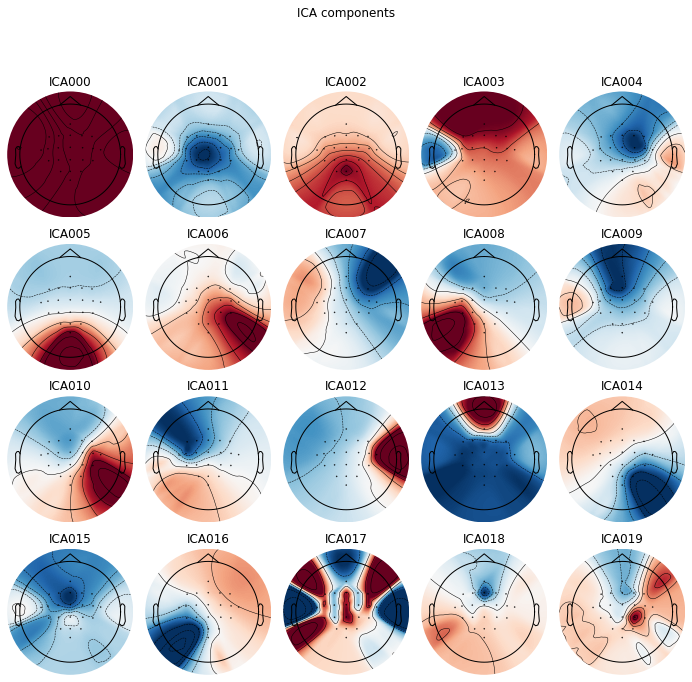

[<MNEFigure size 702x696.24 with 20 Axes>]

In [12]:
ica.plot_components(outlines='skirt')

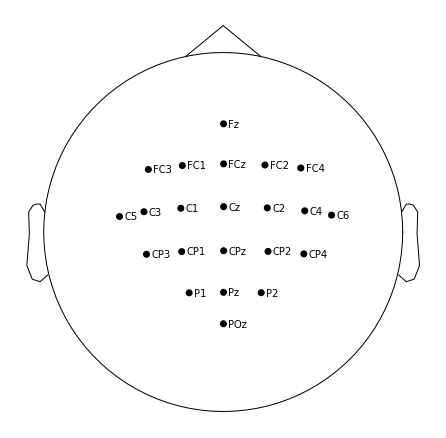

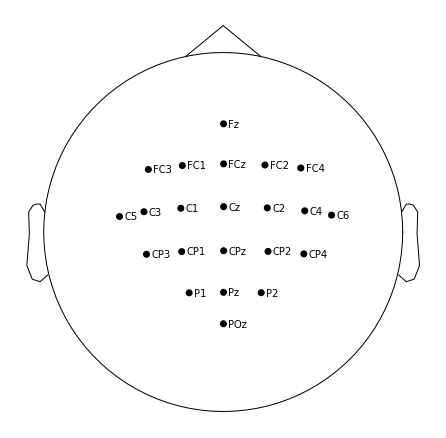

In [13]:
custom_raw.plot_sensors(show_names=True)

In [92]:
ica.exclude = [1,10,14,17,18,19]

In [22]:
bad_idx,socres = ica.find_bads_eog(custom_raw,ch_name = ['FPz','FP1','FP2'],threshold=1)
print(bad_idx)

Using EOG channels: FPz, FP1, FP2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency:

In [23]:
ica.exclude = [0]

In [25]:
ica_raw = ica.apply(custom_raw.copy(),exclude=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components


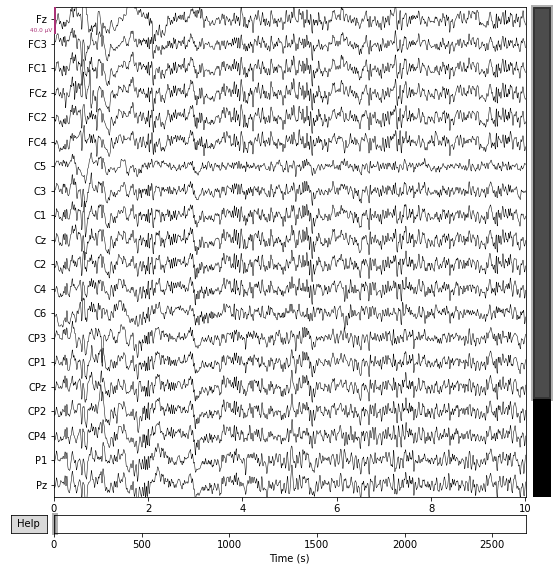

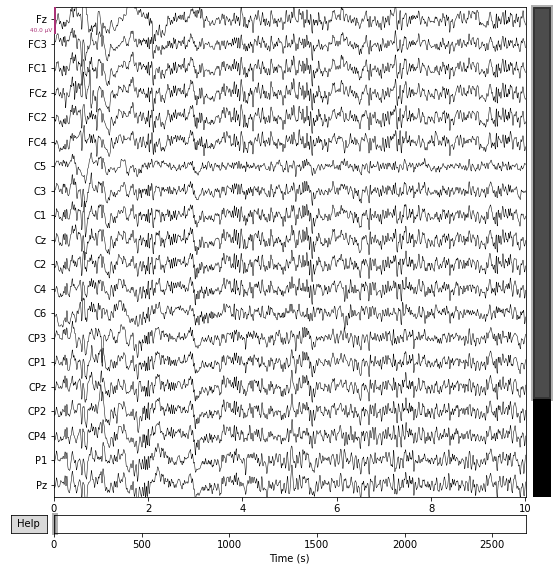

In [26]:
ica.apply(custom_raw.copy(),exclude=ica.exclude).plot()

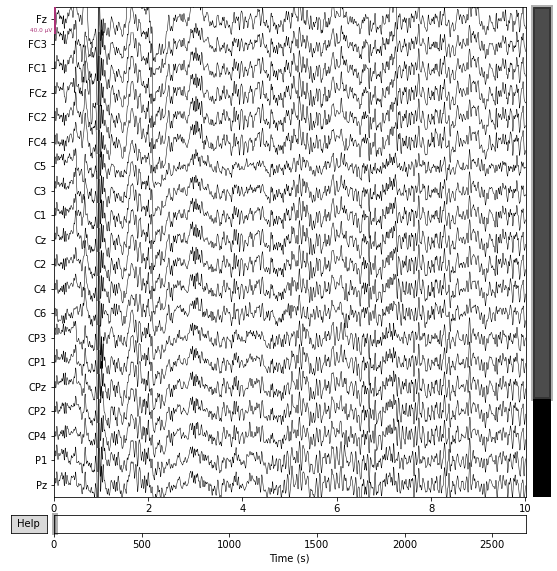

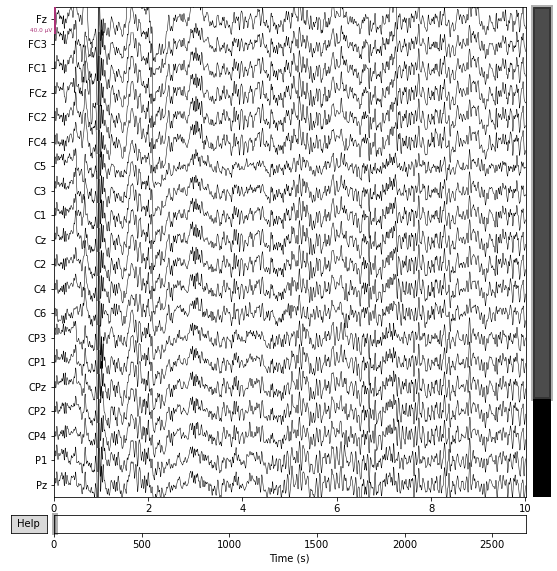

In [21]:
custom_raw.plot()

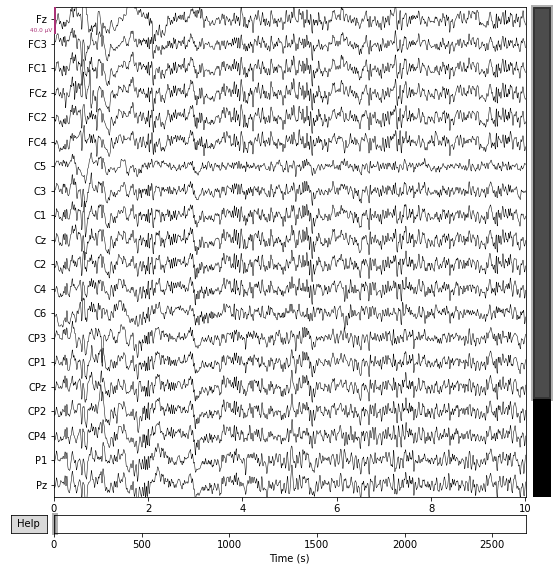

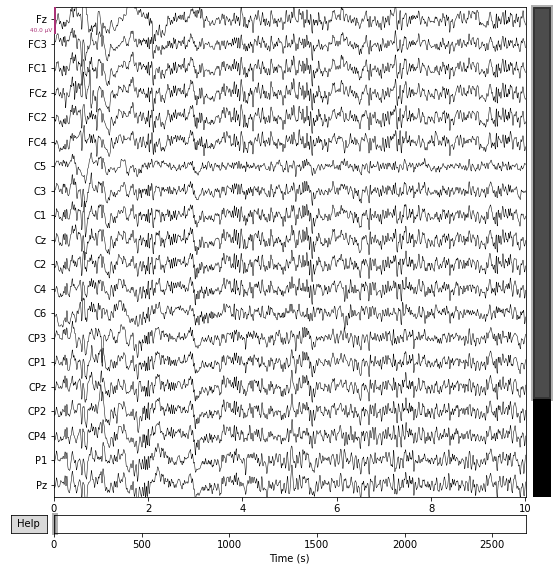

In [27]:
ica_raw.plot()

### Epochs

In [43]:
custom_mapping = {'769':3,'770':4,'771':5,'772':6}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
raw_epochs = mne.Epochs(ica_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=0.8)

Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 326 original time points ...
0 bad epochs dropped


No projector specified for this dataset. Please consider the method self.add_proj.


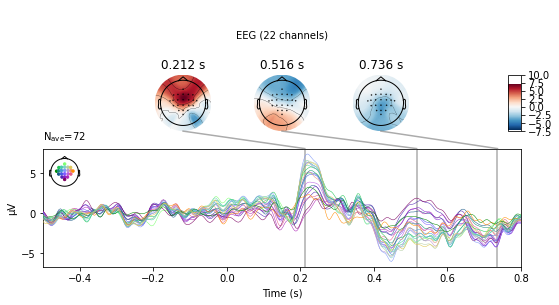

No projector specified for this dataset. Please consider the method self.add_proj.


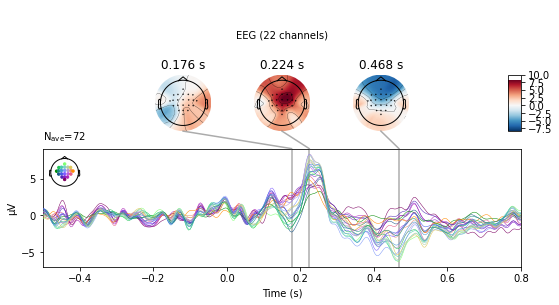

No projector specified for this dataset. Please consider the method self.add_proj.


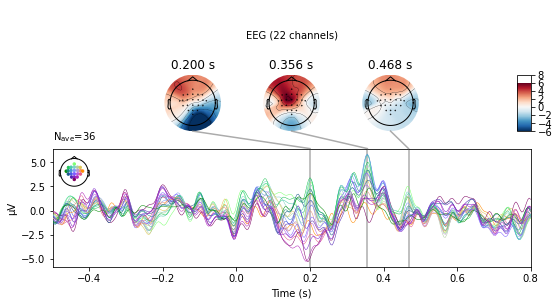

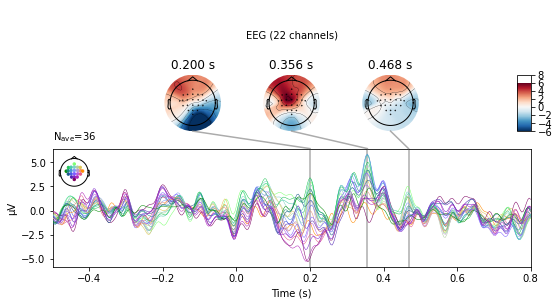

In [44]:
left_evoked = raw_epochs['769'].average()
right_evoked = raw_epochs['770'].average()
diff = mne.combine_evoked([left_evoked,right_evoked],weights=[1,-1])
left_evoked.plot_joint()
right_evoked.plot_joint()
diff.plot_joint()

In [49]:
rois = mne.channels.make_1020_channel_selections(diff.info,midline='z12')
rois

{'Left': array([13,  6,  7,  1]),
 'Midline': array([21, 18, 20, 19, 14, 16, 15,  8, 10,  9,  2,  4,  3,  0]),
 'Right': array([17, 12, 11,  5])}

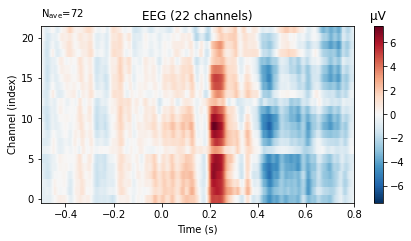

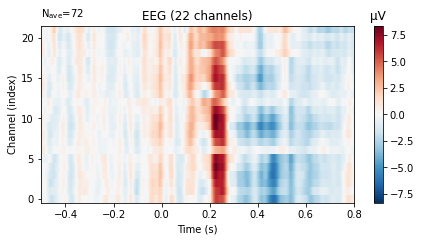

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

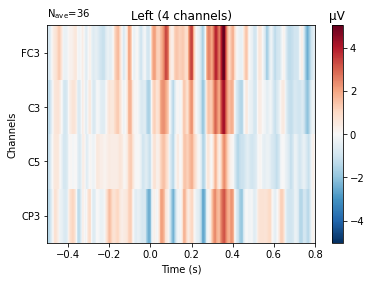

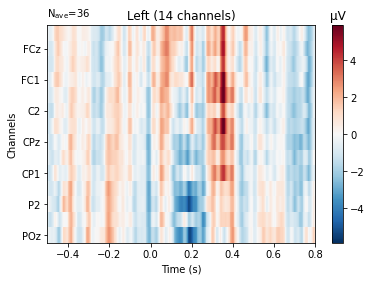

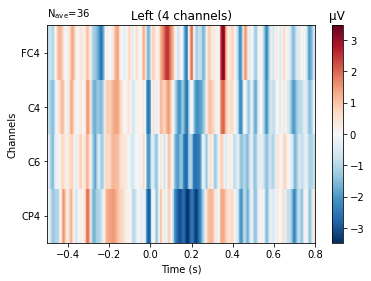

In [51]:
left_evoked.plot_image()
right_evoked.plot_image()
diff.plot_image(show_names=True,group_by=rois,show=False)

combining channels using "gfp"
combining channels using "gfp"


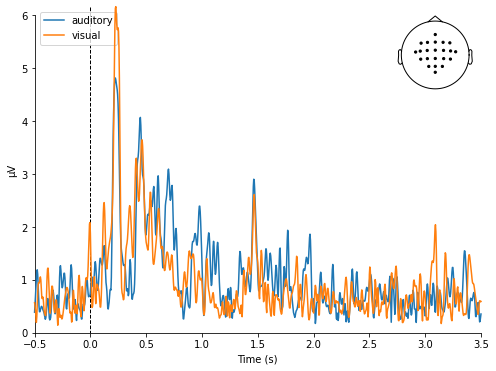

[<Figure size 576x432 with 2 Axes>]

In [36]:
mne.viz.plot_compare_evokeds(dict(auditory=left_evoked, visual=right_evoked),
                             legend='upper left', show_sensors='upper right')

In [108]:
events_from_annot

array([], shape=(0, 3), dtype=int32)

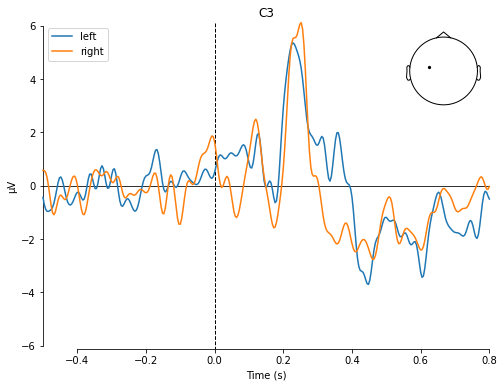

[<Figure size 576x432 with 2 Axes>]

In [60]:
mne.viz.plot_compare_evokeds({'left':left_evoked,'right':right_evoked},picks=[7])

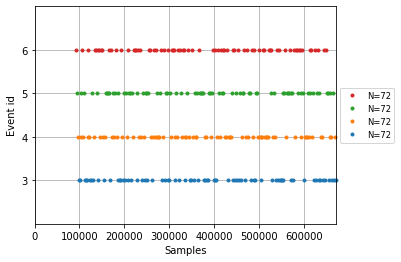

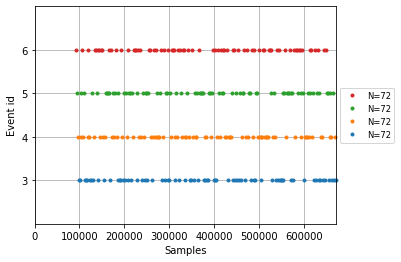

In [29]:
mne.viz.plot_events(events_from_annot)

In [30]:

epochs = mne.Epochs(ica_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=3.5)

Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 1001 original time points ...
0 bad epochs dropped


In [129]:
plt.rcParams['figure.figsize']=30,30

In [31]:
epochs.save('A01T_ica_epo.fif')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6908\438254443.py:1: DeprecationWarning: ch_names cannot be set directly. Please use methods inst.add_channels(), inst.drop_channels(), inst.pick_channels(), inst.rename_channels(), inst.reorder_channels() and inst.set_channel_types() instead. This warning will turn into an error after 0.24
  raw.info['ch_names'] = ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1','CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz','FP1','FPz','FP2']
